In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import io


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 

In [4]:
import base64

In [5]:
client_id='7daa2a7a70cf4a7e91f80c742c03f948'
client_secret='fb93bc4f3b3c4fa991c4bec6ee3cd8ee'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [6]:
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('Manny', '36IZg1bdC78r9IawSOxbuB')

In [7]:
print(len(ids))
print(ids)

100
['1rqqCSm0Qe4I9rUvWncaom', '2dpaYNEQHiRxtZbfNsse99', '2iUXsYOEPhVqEBwsqP70rE', '15vzANxN8G9wWfwAJLLMCg', '6FRLCMO5TUHTexlWo8ym1W', '4VUwkH455At9kENOfzTqmF', '5TVirkSwFEXF1nLJEebe2I', '5sIx4BlfYGuZeSLF40N9GH', '5N5k9nd479b1xpDZ4usjrg', '1zB4vmk8tFRmM9UULNzbLB', '7dt6x5M1jzdTEt8oCbisTK', '45Egmo7icyopuzJN0oMEdk', '3GCdLUSnKSMJhs4Tj6CV3s', '0SuLAslEMFZAXf0SwY7syi', '3U4isOIWM3VvDubwSI3y7a', '2Z8WuEywRWYTKe1NybPQEW', '5Z3GHaZ6ec9bsiI5BenrbY', '52okn5MNA47tk87PeZJLEL', '07FkzikE6FuHIa8Ma7zJGc', '6S0OgCvZBzOcINkdSZS5lY', '3gbBpTdY8lnQwqxNCcf795', '3SipFlNddvL0XNZRLXvdZD', '2Za1AlJNvksouPPWbXpR2X', '1mea3bSkSGXuIRvnydlB5b', '3B54sVLJ402zGa6Xm4YGNe', '5WMr0rpgYeYXNSXar5IAvi', '77ZdAoTHYoF6Umo76HFD4m', '5lNuqFVMca4vPupY10cH0J', '1hWYT0w2R0J19rlVkiez7X', '5L79aNYCTKiZq7vaOElXYj', '3LlAyCYU26dvFZBDUIMb7a', '6Z8R6UsFuGXGtiIxiD8ISb', '3CRDbSIZ4r5MsZ0YwxuEkn', '3bidbhpOYeV4knp8AIu8Xn', '0qOnSQQF0yzuPWsXrQ9paz', '6YUTL4dYpB9xZO5qExPf05', '3Te8uLyit6X3ncNW8Fp3K2', '04aAxqtGp5pv12UXAg4pkq', '7s0lDK

In [8]:
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

  # meta
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']

  # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, release_date, length, popularity, danceability, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track

In [9]:
# loop over track ids 
tracks = []
for i in range(len(ids)):
    time.sleep(.5)
    track = getTrackFeatures(ids[i])
    tracks.append(track)

# create dataset
df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
df.to_csv("spotify.csv", sep = ',')

In [10]:
df.insert(13, "target", 1)
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,target,speechiness,tempo,time_signature
0,High Hopes,Pray for the Wicked,Panic! At The Disco,2018-06-22,190946,77,0.579,0.1930,0.579,0.904,0.000000,0.0640,-2.729,1,0.0618,82.014,4
1,Happier,Happier,Marshmello,2018-08-17,214289,79,0.687,0.1910,0.687,0.792,0.000000,0.1670,-2.749,1,0.0452,100.015,4
2,Youngblood,Youngblood (Deluxe),5 Seconds of Summer,2018-06-15,203417,77,0.596,0.0169,0.596,0.854,0.000000,0.1240,-5.114,1,0.4630,120.274,4
3,Paris,Paris,The Chainsmokers,2017-01-13,221520,66,0.646,0.0243,0.646,0.644,0.000000,0.0888,-6.763,1,0.0310,99.999,4
4,Girls Like You (feat. Cardi B) - Cardi B Version,Girls Like You (feat. Cardi B),Maroon 5,2018-05-30,235545,65,0.851,0.5680,0.851,0.541,0.000000,0.1300,-6.825,1,0.0505,124.959,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,It's Time,Night Visions,Imagine Dragons,2012-09-04,237986,62,0.656,0.0162,0.656,0.884,0.000000,0.1450,-4.748,1,0.0372,105.009,4
96,Waiting For Love,Stories,Avicii,2015-10-02,230613,79,0.579,0.3100,0.579,0.736,0.000000,0.1980,-3.863,1,0.0527,127.999,4
97,Monaco,Bad Girls EP,MKTO,2015-07-24,227226,48,0.653,0.0754,0.653,0.651,0.000000,0.0562,-5.128,1,0.0276,99.036,4
98,Miss You,Miss You,Louis Tomlinson,2017-12-01,182026,60,0.541,0.0216,0.541,0.690,0.000000,0.2570,-5.391,1,0.2060,180.239,3


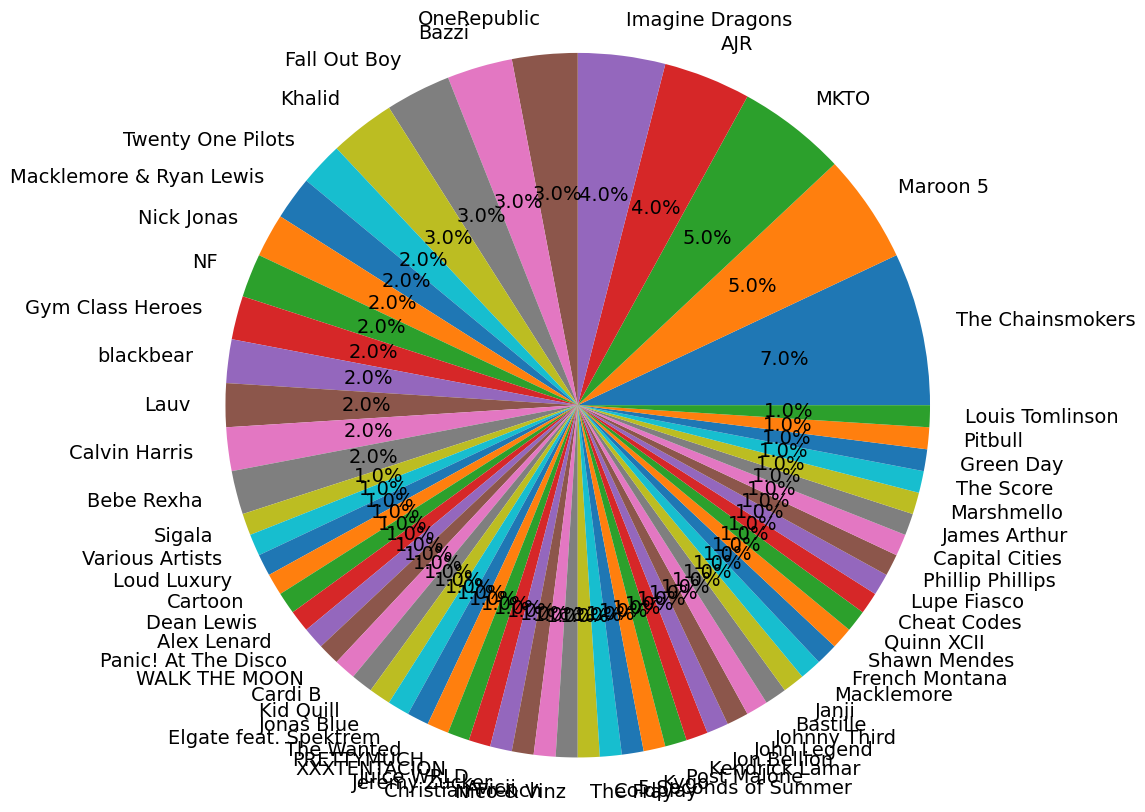

In [11]:
df_genre = df['artist'].value_counts() / len(df)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()

# Pie chart for genre
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
plt.show()

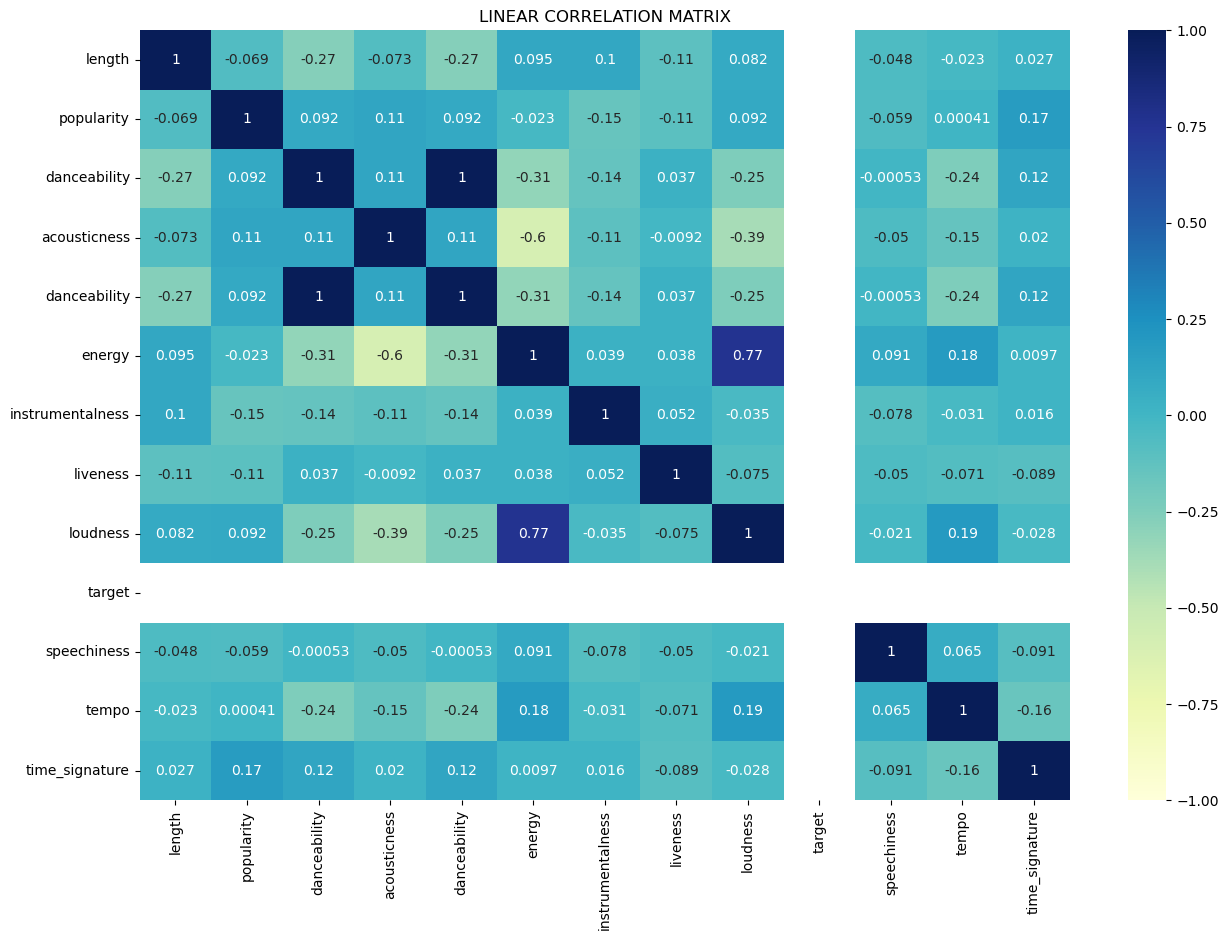

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('LINEAR CORRELATION MATRIX')
plt.show()


In [13]:
most = df.query('popularity > 10', inplace = False).sort_values('popularity', ascending = False)
most[:10]

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,target,speechiness,tempo,time_signature
23,Viva La Vida,Viva La Vida or Death and All His Friends,Coldplay,2008-05-26,242373,82,0.486,0.095400,0.486,0.617,0.000003,0.1090,-7.115,1,0.0287,138.015,4
39,Say You Won't Let Go,Back from the Edge,James Arthur,2016-10-28,211466,82,0.358,0.695000,0.358,0.557,0.000000,0.0902,-7.398,1,0.0590,85.043,4
14,All of Me,Love In The Future (Expanded Edition),John Legend,2013-08-30,269560,82,0.422,0.922000,0.422,0.264,0.000000,0.1320,-7.064,1,0.0322,119.930,4
90,Lucid Dreams,Goodbye & Good Riddance,Juice WRLD,2018-12-10,239835,81,0.511,0.349000,0.511,0.566,0.000000,0.3400,-7.230,1,0.2000,83.903,4
32,Stressed Out,Blurryface,Twenty One Pilots,2015-05-15,202333,81,0.734,0.046200,0.734,0.637,0.000023,0.0602,-5.677,1,0.1410,169.977,4
9,Thunder,Evolve,Imagine Dragons,2017-06-23,187146,81,0.605,0.006710,0.605,0.822,0.134000,0.1470,-4.833,1,0.0438,167.997,4
12,All The Stars (with SZA),Black Panther The Album Music From And Inspire...,Kendrick Lamar,2018-02-09,232186,81,0.698,0.060500,0.698,0.633,0.000194,0.0926,-4.946,1,0.0597,96.924,4
1,Happier,Happier,Marshmello,2018-08-17,214289,79,0.687,0.191000,0.687,0.792,0.000000,0.1670,-2.749,1,0.0452,100.015,4
96,Waiting For Love,Stories,Avicii,2015-10-02,230613,79,0.579,0.310000,0.579,0.736,0.000000,0.1980,-3.863,1,0.0527,127.999,4
31,Safe And Sound,In A Tidal Wave Of Mystery (Deluxe Edition),Capital Cities,2013,192789,79,0.655,0.000176,0.655,0.819,0.003740,0.1040,-4.852,1,0.0316,117.956,5


In [14]:
least = df.sort_values('popularity', ascending = True).head(10)
least

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,target,speechiness,tempo,time_signature
75,A Song to Sing (feat. Mark Battles & Devvon Te...,The Name Above the Title,Kid Quill,2016-10-14,185486,0,0.745,0.20900,0.745,0.741,0.000000,0.5100,-7.212,1,0.1840,94.002,4
50,Shine,Shine,Elgate feat. Spektrem,2014-07-02,228675,0,0.545,0.00580,0.545,0.811,0.000089,0.4620,-5.866,1,0.0712,128.058,4
25,FFYL,Change of Scenery,Quinn XCII,2015-04-28,226500,0,0.722,0.22600,0.722,0.762,0.000007,0.1170,-4.760,1,0.0530,120.038,4
77,Who Do You Love,World War Joy...Kills You Slowly,The Chainsmokers,2019-03-29,226746,0,0.510,0.00791,0.510,0.835,0.000000,0.2190,-4.673,1,0.0447,140.024,4
61,Weak,The Click,AJR,2017-06-09,201159,0,0.669,0.13100,0.669,0.579,0.000000,0.1900,-6.341,1,0.0468,123.979,4
91,i'm so tired...,i'm so tired...,Lauv,2019-01-24,162582,0,0.599,0.17600,0.599,0.733,0.000000,0.2420,-7.058,1,0.2030,102.211,4
64,Who We Are,Smoke + Mirrors (Deluxe),Imagine Dragons,2015-10-16,249346,0,0.483,0.00717,0.483,0.657,0.274000,0.2890,-7.038,1,0.0359,86.963,4
19,Young Ones,Young Ones,Johnny Third,2014-08-24,266250,0,0.540,0.03750,0.540,0.818,0.000000,0.0911,-2.602,1,0.0482,127.955,4
78,Drama,The Click,AJR,2017-06-09,204424,0,0.558,0.20000,0.558,0.624,0.000000,0.1100,-6.042,1,0.1690,156.070,4
68,I'm Not Famous,The Click,AJR,2017-06-09,220457,0,0.627,0.00200,0.627,0.815,0.000000,0.3240,-6.010,1,0.0688,95.072,4


[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

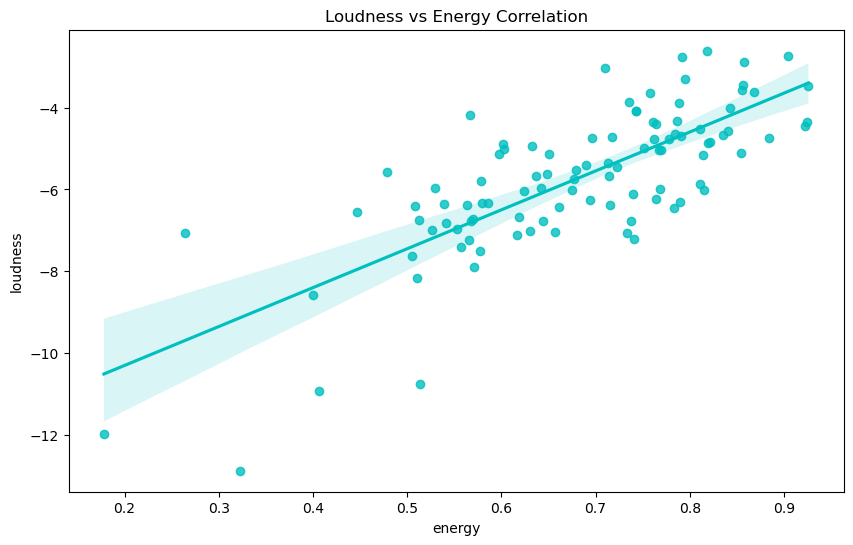

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, y='loudness', x='energy', color='c').set(title='Loudness vs Energy Correlation')

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

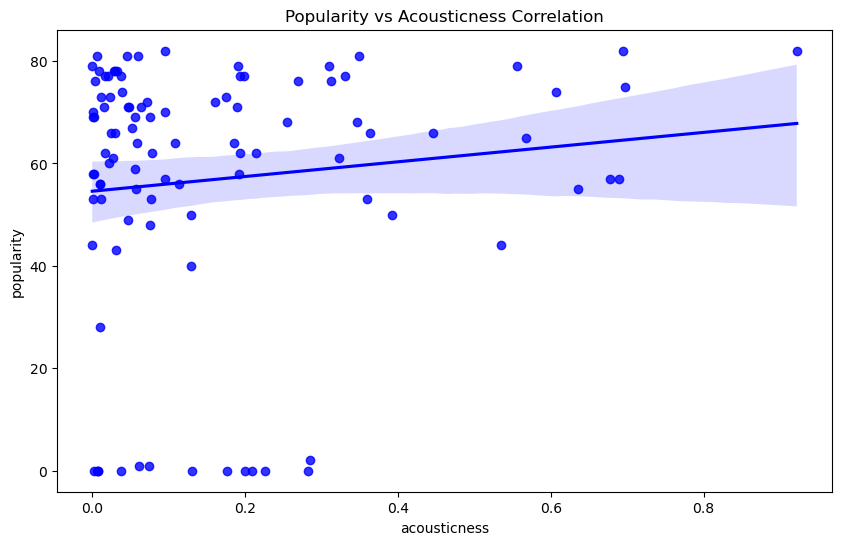

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, y='popularity', x='acousticness', color='b').set(title='Popularity vs Acousticness Correlation')

[Text(0.5, 1.0, 'Top 5 artist by Popularity')]

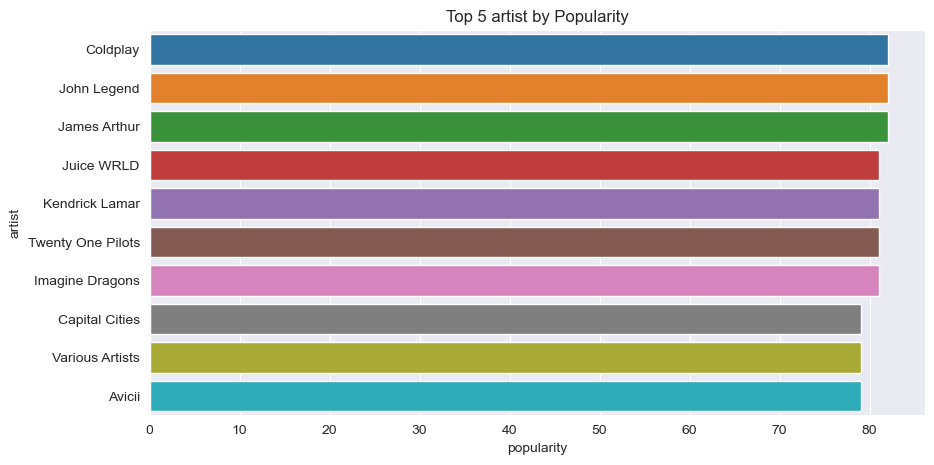

In [17]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
popular = df.sort_values('popularity', ascending=False).head(10)
sns.barplot(y = 'artist', x = 'popularity', data = popular).set(title='Top 5 artist by Popularity')

[Text(0.5, 1.0, 'Top 5 album by Popularity')]

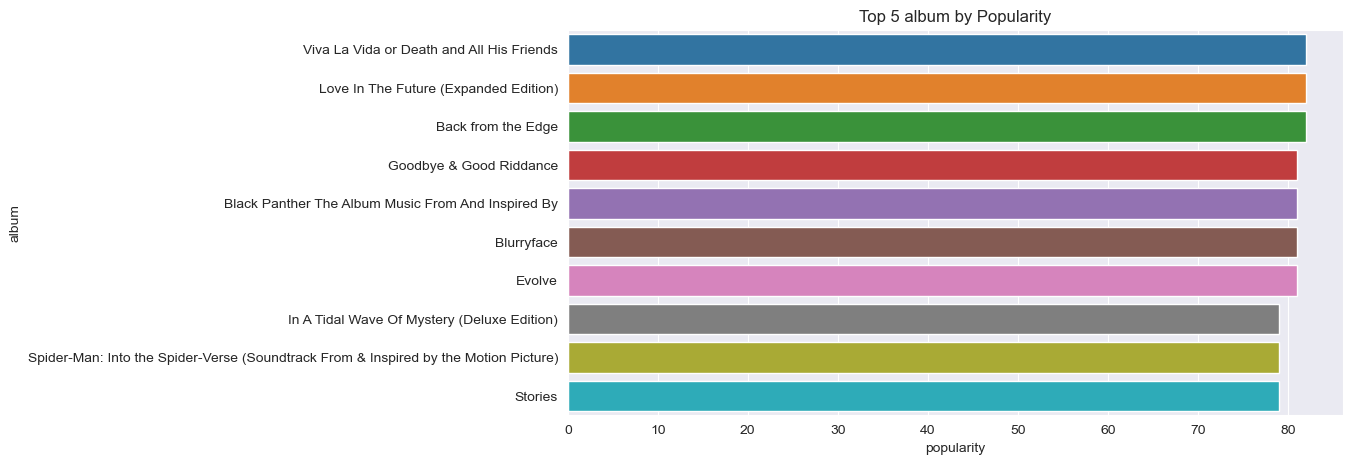

In [18]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
popular = df.sort_values('popularity', ascending=False).head(10)
sns.barplot(y = 'album', x = 'popularity', data = popular).set(title='Top 5 album by Popularity')

[Text(0.5, 1.0, 'Top 5 names by Popularity')]

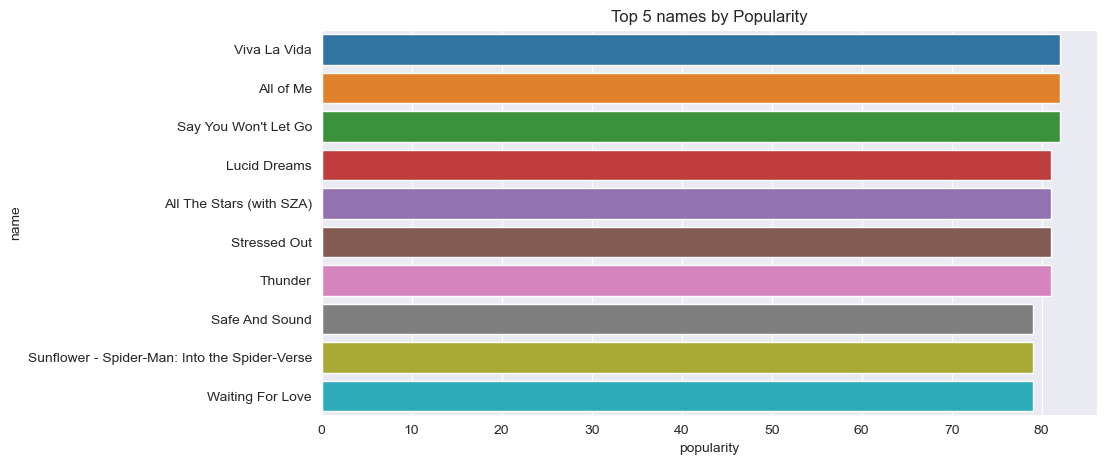

In [19]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
popular = df.sort_values('popularity', ascending=False).head(10)
sns.barplot(y = 'name', x = 'popularity', data = popular).set(title='Top 5 names by Popularity')

[Text(0.5, 1.0, 'Top 5 names by loudness')]

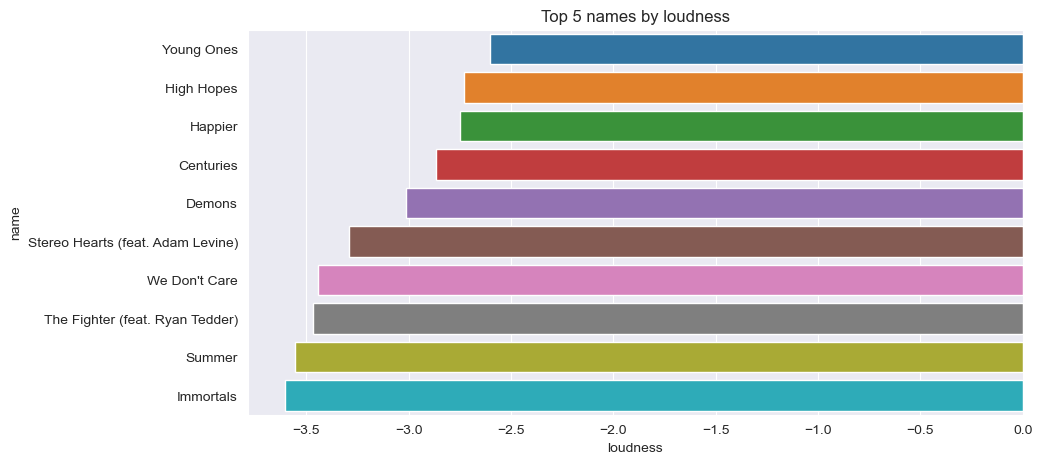

In [20]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
popular = df.sort_values('loudness', ascending=False).head(10)
sns.barplot(y = 'name', x = 'loudness', data = popular).set(title='Top 5 names by loudness')

[Text(0.5, 1.0, 'Top 5 artist by instru')]

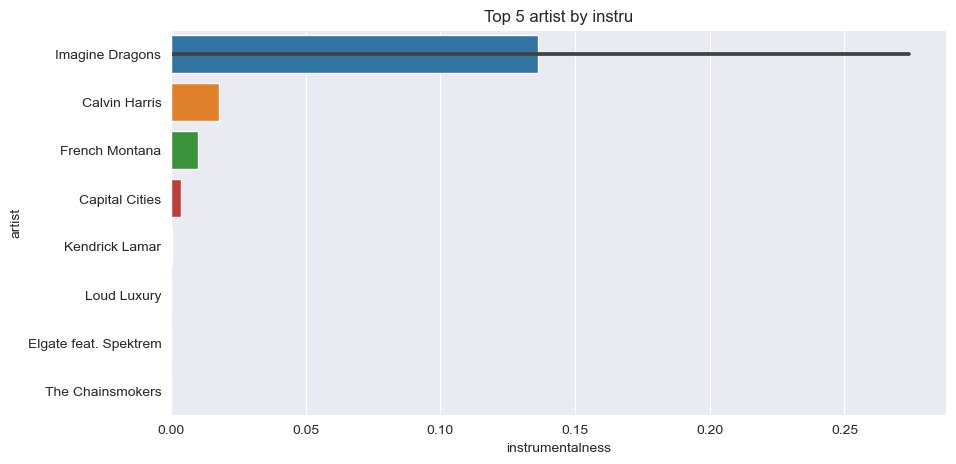

In [21]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
popular = df.sort_values('instrumentalness', ascending=False).head(10)
sns.barplot(y = 'artist', x = 'instrumentalness', data = popular).set(title='Top 5 artist by instru')

In [22]:
intrest_fature_cols=['tempo','loudness','acousticness','danceability','length','energy','instrumentalness','liveness','speechiness','popularity']

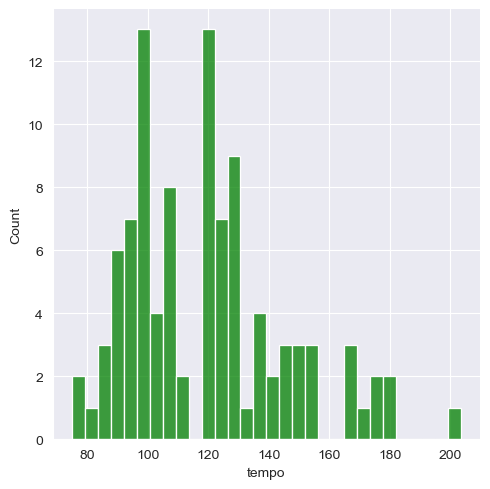

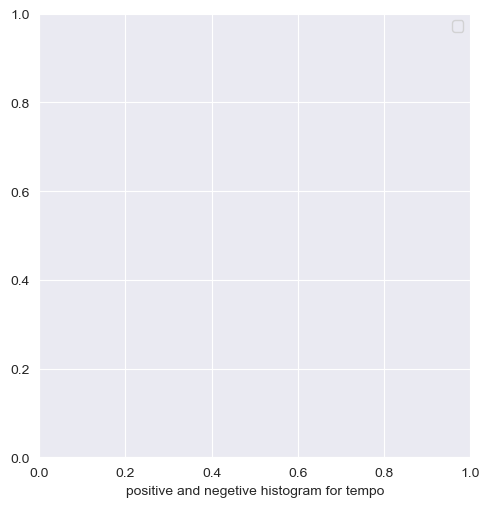

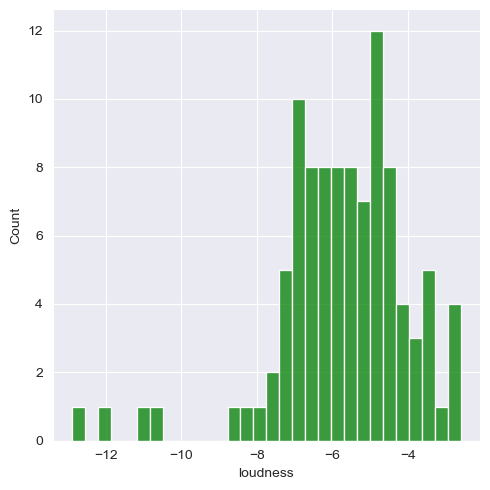

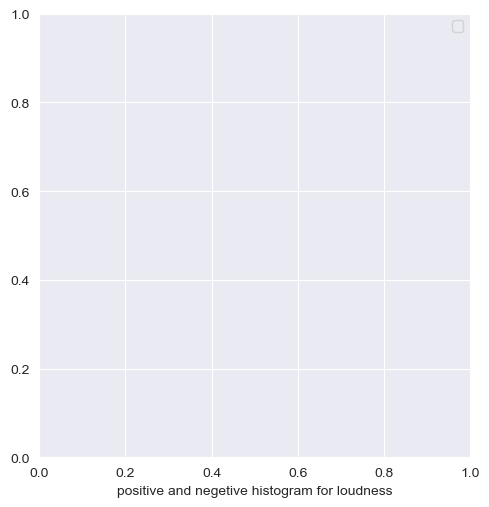

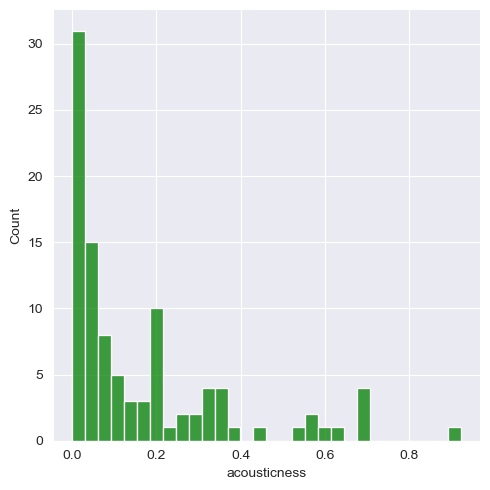

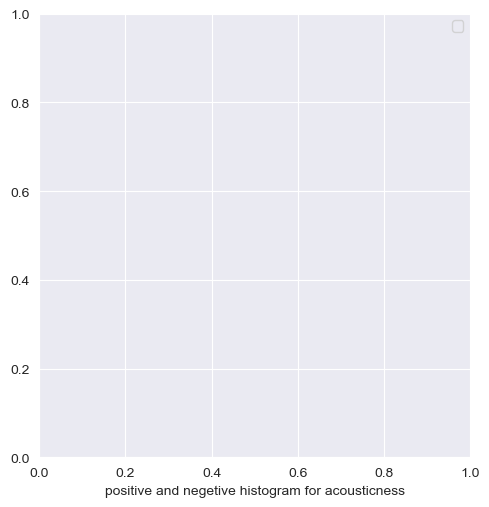

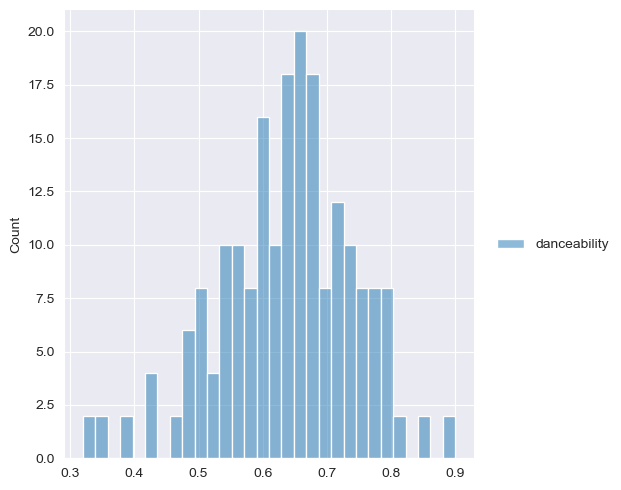

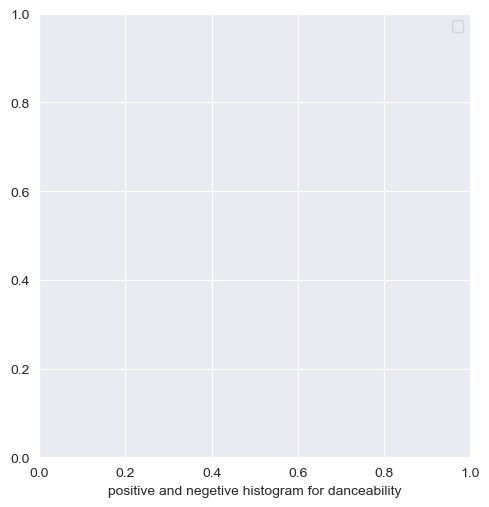

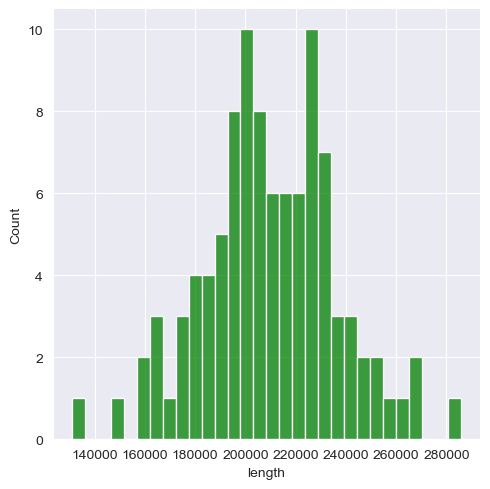

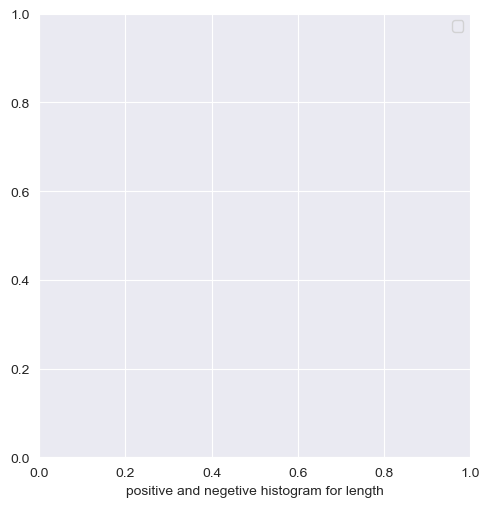

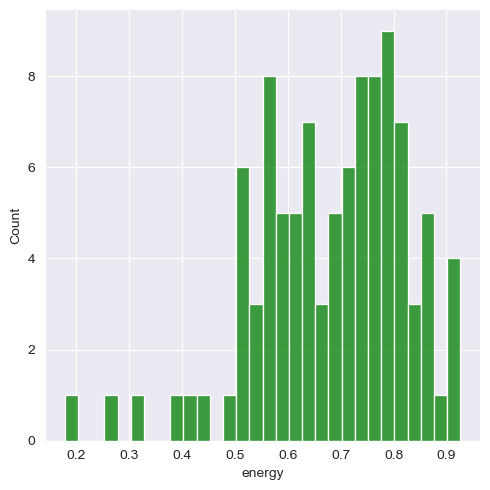

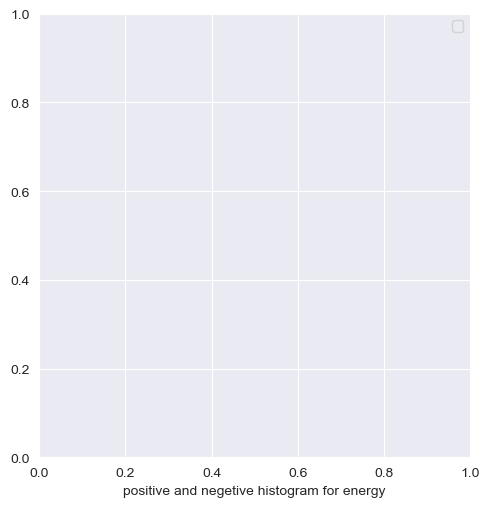

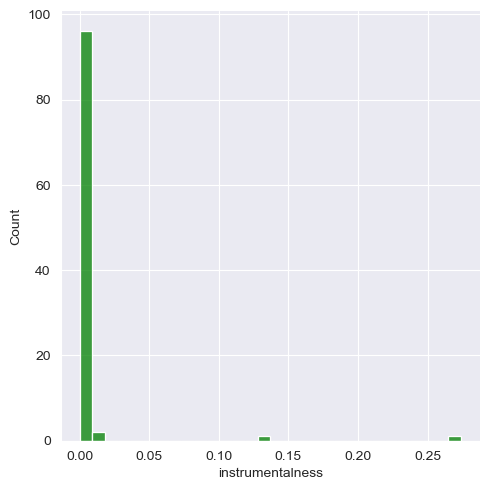

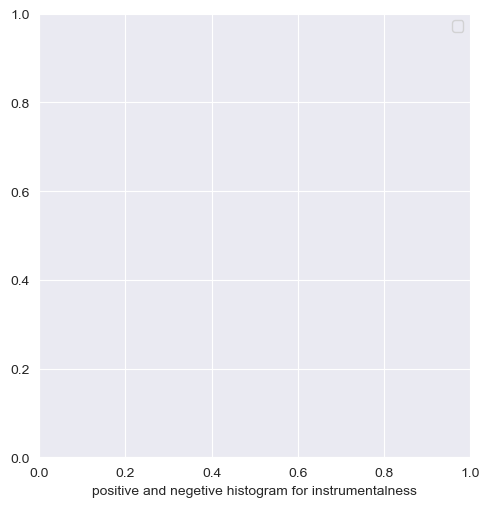

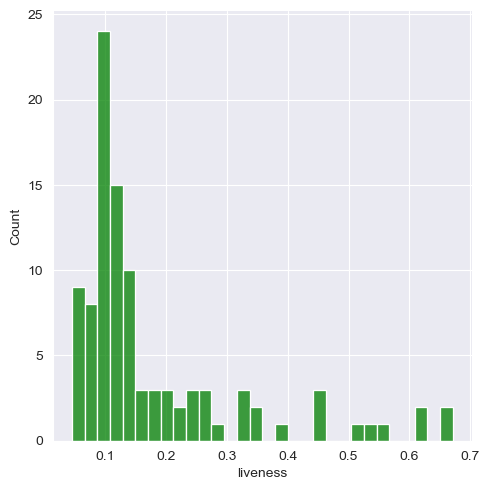

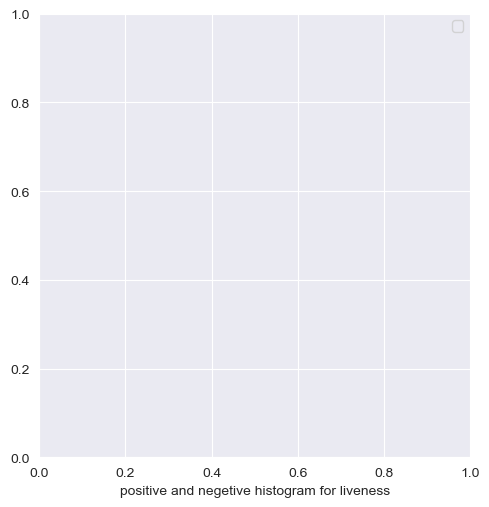

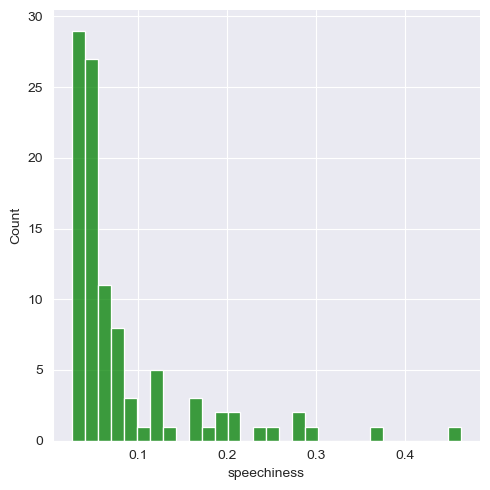

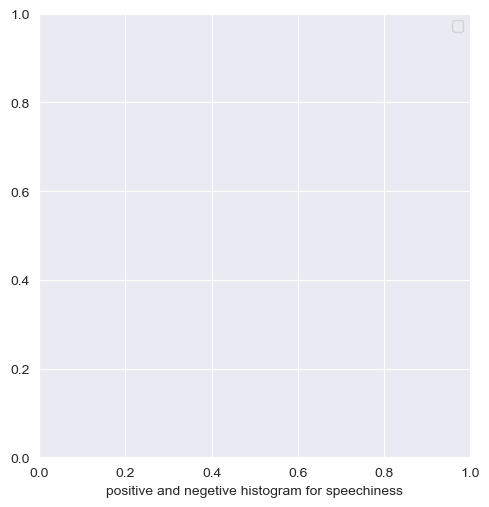

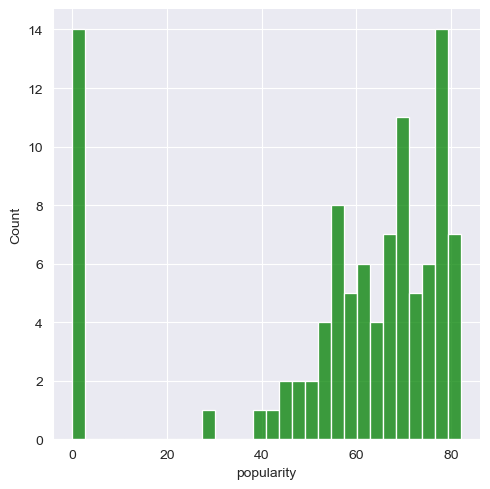

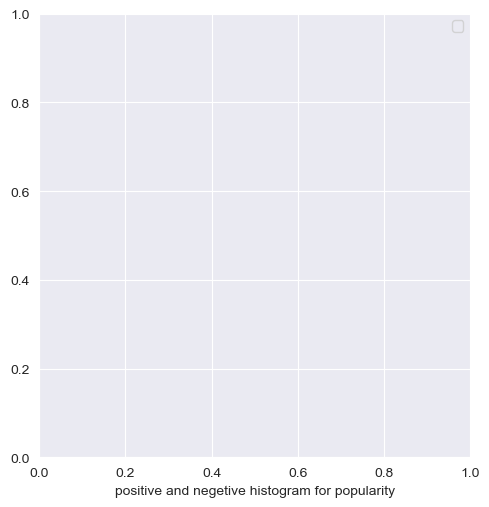

In [23]:
for feature_col in intrest_fature_cols:
    pos_data=df[df['target']==1][feature_col]
    neg_data=df[df['target']==0][feature_col]
    
    sns.displot(pos_data, bins=30, label='positive', color='green')
    sns.displot(neg_data, bins=30, label='negetive', color='red')
    
    plt.legend(loc='upper right')
    plt.xlabel(f'positive and negetive histogram for {feature_col}')
    plt.show()

In [24]:
df.set_index('release_date', inplace = True)
df.index=pd.to_datetime(df.index)
df.head()

,name,album,artist,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,target,speechiness,tempo,time_signature
release_date,,,,,,,,,,,,,,,,
2018-06-22,High Hopes,Pray for the Wicked,Panic! At The Disco,190946,77,0.579,0.1930,0.579,0.904,0.0,0.0640,-2.729,1,0.0618,82.014,4
2018-08-17,Happier,Happier,Marshmello,214289,79,0.687,0.1910,0.687,0.792,0.0,0.1670,-2.749,1,0.0452,100.015,4
2018-06-15,Youngblood,Youngblood (Deluxe),5 Seconds of Summer,203417,77,0.596,0.0169,0.596,0.854,0.0,0.1240,-5.114,1,0.4630,120.274,4
2017-01-13,Paris,Paris,The Chainsmokers,221520,66,0.646,0.0243,0.646,0.644,0.0,0.0888,-6.763,1,0.0310,99.999,4
2018-05-30,Girls Like You (feat. Cardi B) - Cardi B Version,Girls Like You (feat. Cardi B),Maroon 5,235545,65,0.851,0.5680,0.851,0.541,0.0,0.1300,-6.825,1,0.0505,124.959,4


In [25]:
df['dates']=df.index.get_level_values('release_date')
df.dates=pd.to_datetime(df.dates)
years=df.dates.dt.year

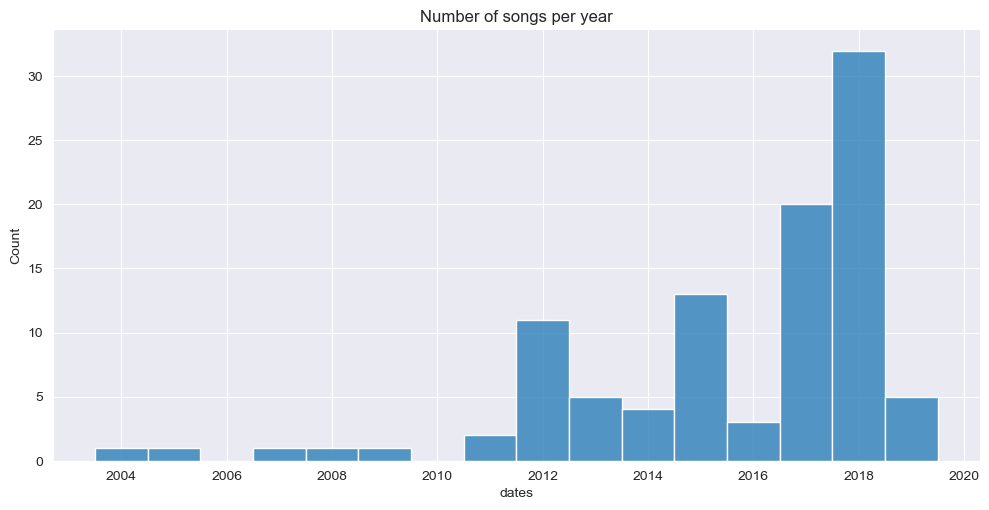

In [26]:
sns.displot(years, discrete=True, aspect=2, height=5, kind='hist').set(title='Number of songs per year')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2004'),
  Text(1, 0, '2005'),
  Text(2, 0, '2007'),
  Text(3, 0, '2008'),
  Text(4, 0, '2009'),
  Text(5, 0, '2011'),
  Text(6, 0, '2012'),
  Text(7, 0, '2013'),
  Text(8, 0, '2014'),
  Text(9, 0, '2015'),
  Text(10, 0, '2016'),
  Text(11, 0, '2017'),
  Text(12, 0, '2018'),
  Text(13, 0, '2019')])

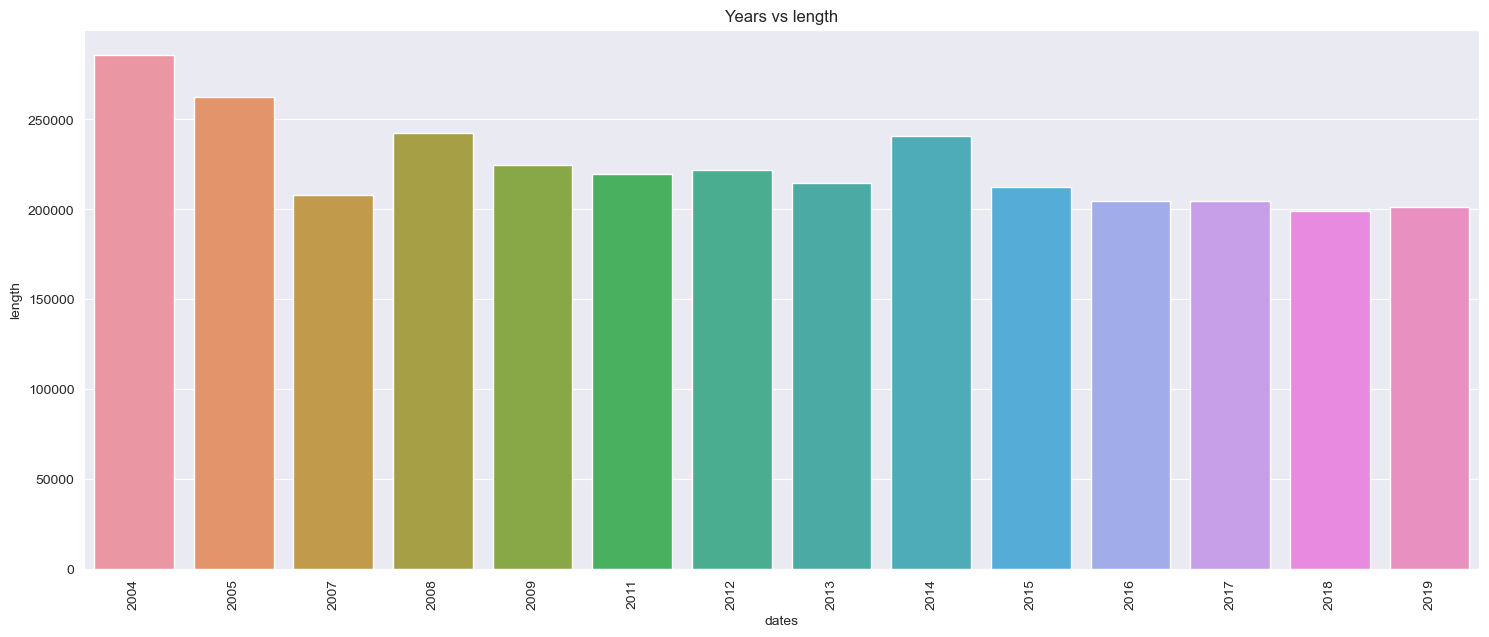

In [27]:
total_dr = df.length
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x = years, y = total_dr, ax = ax, errwidth = False).set(title='Years vs length')
plt.xticks(rotation=90)

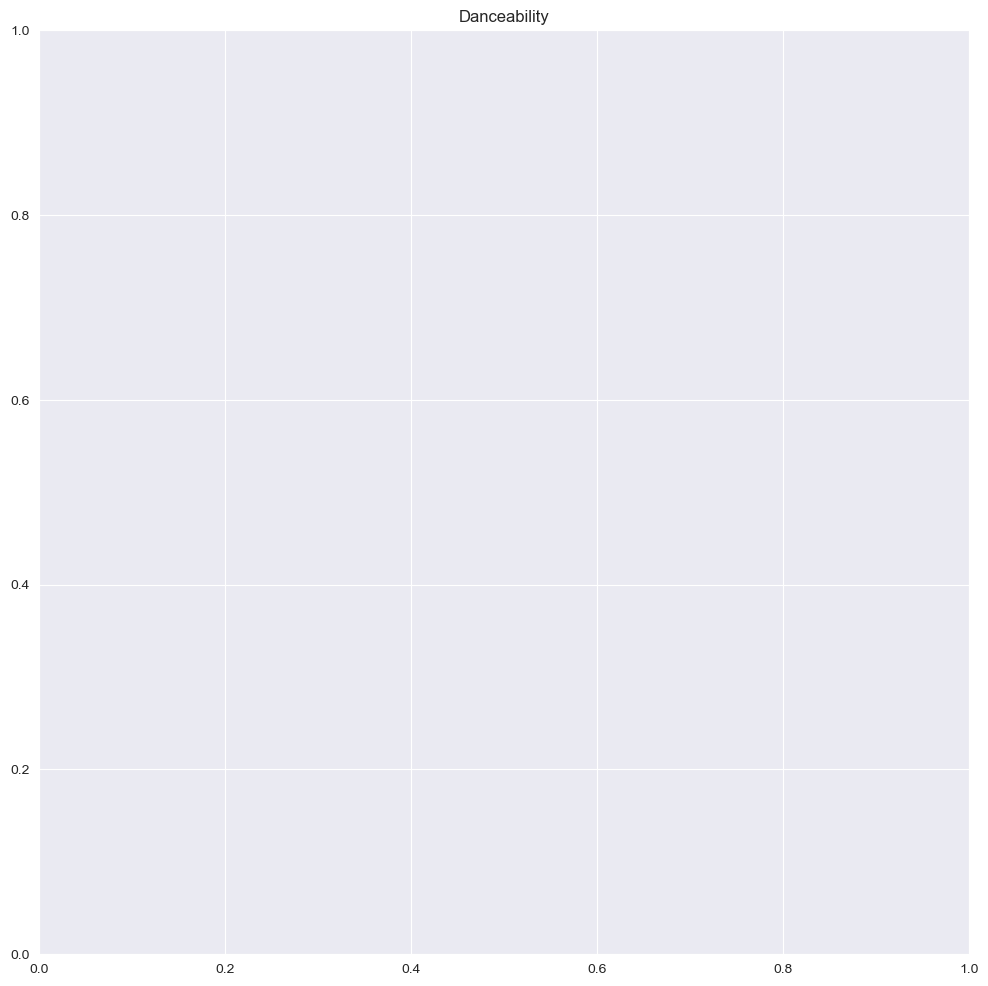

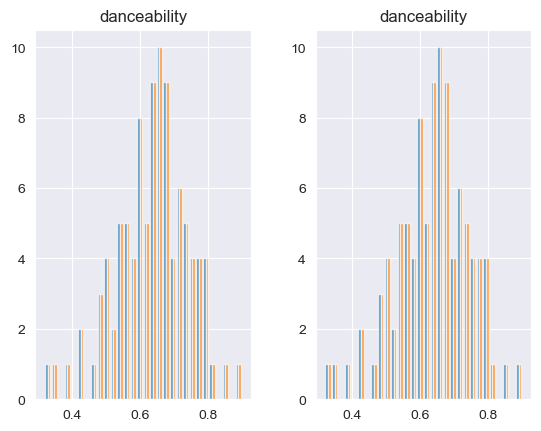

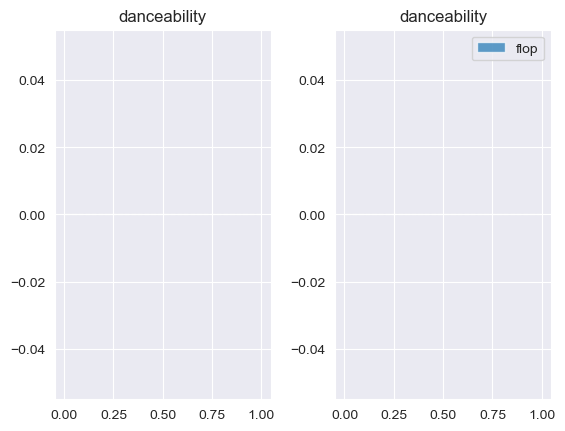

In [28]:
hit_danceability = df[df['target']==1]['danceability']
flop_danceability = df[df['target']==0]['danceability']
fig = plt.figure(figsize=(12,12))
plt.title('Danceability')
hit_danceability.hist(alpha = 0.7, bins = 30, label = 'hit')
flop_danceability.hist(alpha = 0.7, bins = 30, label = 'flop')
plt.legend()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16528\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
